In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Iteração de Rayleigh

Vimos que podemos iterar um vetor $v$ pela matriz $A$, obtendo a sequência de vetores $A^nv$, por multiplicações sucessivas, e que isso permite encontrar um autovetor.

## Questão 1

Implemente uma função `itera(A,v,tol,debug)` que itera o vetor $v$, normalizando a cada iteração, e que retorna $(v_\lambda, \lambda, n)$, respectivamente:
- uma estimativa do autovetor
- uma estimativa do autovalor correspondente
- o número de iterações realizadas até atingir a precisão `tol`.

Se `debug == True`, retorne também a lista dos vetores (unitários) produzidos ao longo do processo.

In [110]:
def itera(A,v, tol=1e-12, maxiter=1000, debug=False):
    v = np.array(v)
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    
    def eigenvector_normalizer(A,v,n=29):
        answ = []
        answ.append(v)
        for i in range(0,n):
            v_next = A @ answ[-1]
            answ.append(v_next/np.linalg.norm(v_next))
        return answ,n
    
    def eigenvalue_picker(v,u):
        v_max = vs[-1]
        print(v_max)
        return v_max/u
    
    vs,it = eigenvector_normalizer(A,v)
    l = np.linalg.norm(A@vs[-1])
    if debug == True:
        return vs[-1],l,it,vs
    else:
        return vs[-1],l,it 

In [111]:
# Autovetores conhecidos
A = [[1,2],[2,1]]
alvo = np.array([1,1])/np.sqrt(2)

v, l, n = itera(A,[1,2])

assert(abs(l-3) < 1e-15)
assert(all(abs(v-alvo) < 1e-12))
assert(n < 30)

In [112]:
# Autovetores aleatórios: verificando que satisfaz (aproximadamente) a definição
np.random.seed(4444)
A = np.random.rand(4,4)
v, l, n = itera(A, np.random.rand(4))
err = np.dot(A,v) - l*v
assert(np.linalg.norm(err) < 1e-12)
assert(n < 30)

## Questão 2: Convergência

Temos o número de iterações, mas não vimos como o algoritmo "converge" para o autovetor.
Assim, use os vetores intermediários e faça um gráfico da evolução do erro entre os $v$'s produzidos e o autovetor $v_\lambda$.

30


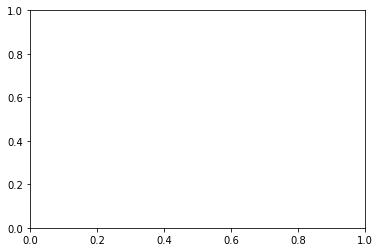

In [132]:
ax = None
v,l,n, vs_intermediarios = itera(A, np.random.rand(4), debug=True)
tam = len(vs_intermediarios)
rng = (0,n)
ks = [([v]*tam)/i for i in vs_intermediarios]
#plt.plot(ks,rng)

ax = plt.gca()
plt.show()

In [ ]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

ys = ax.lines[0].get_ydata()

assert min(ys) < 1e-12
assert np.all(ys[:-1] > ys[1:])

O que o último assert quer dizer?

Compara se o $ys[i]$ é menor que $ys[i-1]$, ou seja, se a lista está convergindo

## Questão 3: Convergência comparada

Para cada um dos vetores `d1` e `d2` abaixo, considere a matriz $A = \operatorname{diag}(d_i)$ correspondente.

In [ ]:
d1 = [1,10,20,30,31,32]
d2 = [1,10,20,29,30,32]

Qual é o autovetor com o maior autovalor para $A_1$ e $A_2$?

YOUR ANSWER HERE

Agora, compare a velocidade de convergência do autovetor usando `itera` para cada uma destas matrizes,
fazendo o gráfico do erro entre os vetores gerados para $A_1$ e $A_2$ no mesmo eixo.

In [ ]:
ax = []

_,_,_,l_1 = itera(np.diag(d1), np.ones_like(d1), debug=True)
_,_,_,l_2 = itera(np.diag(d2), np.ones_like(d2), debug=True)

# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()
plt.show()

In [ ]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

Para qual matriz há convergência mais rápida?  Como você explicaria isso?

YOUR ANSWER HERE

## Questão 4: Convergência?

Sejam $\theta \in [0,2\pi]$ e $\alpha \in \mathbb{R}$,
e considere a matriz 
$$A(\theta, \alpha) = \begin{bmatrix} 
\cos(\theta) & \sin(\theta) & 0\\
-\sin(\theta) &\cos(\theta) &  0\\
0 & 0 & \alpha\\
\end{bmatrix}.$$

Qual a interpretação geométrica dessa matriz?

YOUR ANSWER HERE

Quais são os autovetores de $A$ (em função de $\theta$ e $\alpha$)?

YOUR ANSWER HERE

Implemente a função abaixo que gera a matriz $A$:

In [ ]:
def make_matrix(theta,alpha):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert np.allclose(make_matrix(0,1),np.eye(3))
assert np.allclose(make_matrix(np.pi,0.5),[[-1,0,0],[0,-1,0],[0,0,0.5]])

Fixando $\theta = \dfrac{\pi}{4}$,
faça um gráfico do número de iterações necessários para calcular o maior autovetor,
em função de $\alpha \in [0.5,1.5]$.

In [ ]:
alphas = np.linspace(0.5,1.5,100)
ax = []
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()
plt.show()

In [ ]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert 100 > ys.min() > 60
assert ys[55] < 600
assert ys[50] > 900

Agora, faça o gráfico com a estimativa do autovalor, novamente em função de $\alpha$.

In [ ]:
ax = []

# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()
plt.show()

In [ ]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert np.all(0.7 <= ys) and np.all(ys <= 1.5)

Como explicar a variação no número de iterações? O que isso tem a ver com o autovalor retornado?

YOUR ANSWER HERE

# Parte 2: Generalizando

## Questão 5: Outra iteração, novos limites

Em vez de iterar $A^n v$, é possível iterar $A^{-n} v$.
Assim, em vez de "aumentar" os vetores correspondentes aos autovalores de módulo grande,
estes serão "diminuídos", e sobra o vetor do "menor" (de novo, em módulo) autovalor.

Mostre que $\dfrac{A^{-n}v_0}{\lVert A^{-n}v_0 \rVert} \rightarrow v_{min}$, onde $v_{min}$ é o "menor" autovalor de $A$.

YOUR ANSWER HERE

Agora, generalize um pouco mais:

Seja $\alpha \in C$ um número complexo qualquer.
Mostre que
$$\frac{(A - \alpha I)^{-n}v_0}{\lVert (A - \alpha I)^{-n}v_0 \rVert} \rightarrow v_{\alpha},$$
onde $v_{\alpha}$ é o autovetor de $A$ com autovalor mais próximo de $\alpha$.

Este método é conhecido como "Iteração inversa deslocada".

YOUR ANSWER HERE

## Questão 6: Iteração inversa com deslocamento

Implemente a iteração inversa com deslocamento, com argumentos semelhantes a função `itera`.

In [ ]:
def inverse_iteration(A, v, alpha=0, tol=1e-12, maxiter=1000, debug=False):

    v = np.array(v)
    n,m = np.shape(A)
    assert n==m, 'A must be square'

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
A = [[1,2],[2,1]]
ans = np.array([-1,1])/np.sqrt(2)

v, l, n = inverse_iteration(A,[1,2])

assert np.allclose(np.linalg.norm(v),1)
assert np.allclose(v,ans) or np.allclose(v, -ans)
assert 20 < n < 40

In [ ]:
A = [[1,2],[2,1]]
ans = np.array([1,1])/np.sqrt(2)

v, l, n = inverse_iteration(A,[1,2], alpha=2, maxiter=50)

assert np.allclose(np.linalg.norm(v),1)
assert np.allclose(v,ans) or np.allclose(v, -ans)
assert 20 < n < 40

In [ ]:
A = [[1,2],[2,1]]
ans = np.array([1,1])/np.sqrt(2)

v, l, n = inverse_iteration(A,[1,2], alpha=2.5, maxiter=50)

assert np.allclose(np.linalg.norm(v),1)
assert np.allclose(v,ans) or np.allclose(v, -ans)
assert 10 < n < 20

## Questão 7: Convergência comparada

Faça o gráfico da velocidade de convergência dos autovetores da iteração inversa aplicada à matriz $A$ acima,
para $\alpha \in \{-2,0,2\}$.

In [ ]:
np.random.seed(1234)

ax = []
v0 = np.random.rand(2)


# YOUR CODE HERE
raise NotImplementedError()

plt.ylabel('Distance to eigenvector')

ax = plt.gca()
plt.show()

In [ ]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.get_xlabel() != ""

ys = [l.get_ydata() for l in ax.lines]

assert np.isclose(max(max(y) for y in ys),2)
assert min(min(y) for y in ys) <= 1e-16

Qual valor de $\alpha$ levou à convergência mais rápida?
Como você explicaria isso?

YOUR ANSWER HERE

O que mais você observa neste gráfico?

YOUR ANSWER HERE

## Questão 8: Zoom da convergência

Agora, repita o mesmo gráfico para $\alpha \in \{2, 2.5, 2.9, 2.99 \}$.

In [ ]:
np.random.seed(1234)

ax = []
v0 = np.random.rand(2)


# YOUR CODE HERE
raise NotImplementedError()

plt.ylabel('Distance to eigenvector')

ax = plt.gca()
plt.show()

In [ ]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 4
assert len(ax.legend().texts) == 4
assert ax.get_xlabel() != ""

ys = [l.get_ydata() for l in ax.lines]

assert min(min(y) for y in ys) <= 1e-16

O que este gráfico sugere quanto à velocidade de convergência da iteração inversa?
Será que isso já era possível de "ver" no outro gráfico?

YOUR ANSWER HERE